#**PART 1: DATA IMPUTATION**

In [18]:
import pandas
import numpy as np
from sklearn.preprocessing import StandardScaler

###CHANGING THE CATEGORICAL VARIABLES TO 0 AND 1

> In the below code, the 2 categorical variable(Loan Type and Occupation) are encoded into separate columns. The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column.




In [85]:
trainx = pandas.read_csv("drive/My Drive/MS4610 Data/train_x.csv")
df = pandas.DataFrame(trainx)
df.insert(4,"B",np.nan)            #Inserting a separate column for Loan Type='B', all cells filled NaN by default
df.insert(6,"Y",np.nan)            #Inserting a separate column for Occupation='Y', all cells filled NaN by default
df.insert(7,"Z",np.nan)            #Inserting a separate column for Occupation='Z', all cells filled NaN by default


trainx = np.array(df)

#Assigning each column with 1 or 0, based on the category in each data point

l = len((trainx))
for i in range(l):
    if trainx[i][3] == 'A':
        trainx[i][3] = 1.0
        trainx[i][4] = 0.0        
    elif trainx[i][3] == 'B':
        trainx[i][3] = 0.0
        trainx[i][4] = 1.0
    
    if trainx[i][5] == 'X':
        trainx[i][5] = 1.0
        trainx[i][6] = 0.0       
        trainx[i][7] = 0.0
    elif trainx[i][5] == 'Y':
        trainx[i][5] = 0.0
        trainx[i][6] = 1.0        
        trainx[i][7] = 0.0
    elif trainx[i][5] == 'Z':
        trainx[i][5] = 0.0
        trainx[i][6] = 0.0       
        trainx[i][7] = 1.0

###BRINGING ALL THE DATA IN THE SAME SCALE


> In the below cell, a library function, StandardScaler() has been used. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.



In [86]:
sc = StandardScaler()
trainx = sc.fit_transform(trainx)

### DATA IMPUTATION 


> The below code uses a library function in sklearn, KNNImputer() to impute the values in train_x matrix. We had encoded the Categorical Variables in one of the previous cells. Then we run the library function, KNNImputer() to impute the values in the empty cells of the feature matrix(train_x). After filling the values in train_x matrix(finally getting the matrix, trainx_imputed), we read the labels from train_y vector, and append it to trainx_imputed as 2 columns, using the same logic used while encoding the Categorical variables(convert each category value into a new column and assigns a 1 or 0). After that, we again run the KNN Algorithm to impute and fill up the missing labels.

In [87]:
import numpy as np
from sklearn.impute import KNNImputer

'''In the training set given, the 1st column is the ID(1-80000), which is not a feature. 
So the below line of code takes all columns except the 1st one, and creates and assigns it to the variable, 'x'.'''
x = trainx[:,1:]

imputer = KNNImputer(n_neighbors=10, weights="uniform")  # Defining the imputer
trainx_imputed = imputer.fit_transform(x)  # fitting the imputer on and transforming  the dataset

trainx_imputed1 = trainx_imputed
# Load the label data(train_y vector)
trainy1 = pandas.read_csv("drive/My Drive/MS4610 Data/train_y.csv")
# Converting the read data into a 2-D Array
trainy1 = np.array(trainy1)

'''Appending the label-vector(train_y) to trainx_imputed as 2 columns, using the same logic used while 
encoding the Categorical variables(convert each category value into a new column and assigns a 1 or 0).'''

df1 = pandas.DataFrame(trainx_imputed1)     #Creating a Dataframe of trainx_imputed1
df1.insert(13,"Not Default",np.nan)         #Inserting a separate column for Label='Not Default', all cells filled NaN by default
df1.insert(14,"Default",np.nan)             #Inserting a separate column for Label='Default', all cells filled NaN by default
#Converting the dataframe back into a 2-D Array
trainx_imputed1 = np.array(df1)      

#Assigning each of these 2 colums with 1 or 0, based on the label

for i in range(l):
    if trainy1[i][1] == 0.0:
        trainx_imputed1[i][13] = 1.0
        trainx_imputed1[i][14] = 0.0
    elif trainy1[i][1] == 1.0:
        trainx_imputed1[i][13] = 0.0
        trainx_imputed1[i][14] = 1.0 

imputer1 = KNNImputer(n_neighbors=10, weights="uniform")                # Defining the imputer again
trainx_imputed_final = imputer1.fit_transform(trainx_imputed1)          # fitting the imputer on and transforming  the dataset to get the final fully imputed matrix

trainx_imputed_final[:,13] = (trainx_imputed_final[:,13] > 0.5)
trainx_imputed_final[:,14] = (trainx_imputed_final[:,14] > 0.5)

##DATA SPLITTING

> In the below cell, we are splitting the trainx_imputed_final(which has the data from both train_x and train_y matrices), into the final feature matrix(trainx_final) and the label matrix(trainy_final) and saving it.




In [88]:
'''The first 13 columns of trainx_imputed_final are the feature columns, while the last 2 columns are the labels. 
So, here we first take the first 13 columns, and assign it to trainx_final'''
trainx_final = trainx_imputed_final[:,0:13]    
# The below line is a dummy assignment to define trainy_final so that the size(number of rows) match with that in trainx_imputed_final
trainy_final = trainx_imputed_final[:,13]

'''After the dummy assignment, we loop through the values in the last 2 columns. As per the data given, we are assigning 0 for 'Not Default',
 while 1 for 'Default'. So, if the value in the 14th column is 1(i.e. the loan is Not Default), we assign 0 to that row in trainy_final. 
 If the value in the 14th column is 0, it directly implies the value in 15th column is 1, and we assign 1 to that row in trainy_final.'''

for i in range(l):
    if trainx_imputed_final[i,13] == 1:
        trainy_final[i] = 0.0
    else:
        trainy_final[i] = 1.0

# Saving the final feature matrix and label matrix
np.savetxt("drive/My Drive/MS4610 Data/TRAINX_FINAL.csv", trainx_final, delimiter=",")
np.savetxt("drive/My Drive/MS4610 Data/TRAINY_FINAL.csv", trainy_final, delimiter=",")



##DATA PREPROCESSING FOR TEST DATA
(TO BE PERFORMED ONLY FOR TEST DATA)

We are training the model using a training dataset in which we had encoded the categorical variables into columns, and normalized the data using StandardScaler(). So, when using a new test feature matrix, the labels of which we want to predict, we have to first preprocess it(i.e., encode the categorical variables into columns and normalize the data using StandardScaler() )

##### HENCE, FOR ANY TEST DATA THAT DOES NOT NEED IMPUTATION, IT HAS TO BE PREPROCESSED THROUGH THE BELOW FUNCTION, AND THEN BE FED TO THE MODEL. IF THE TEST DATA HAS BEEN RUN THROUGH THE DATA IMPUTATION(SINCE IT HAS MISSING DATA), IT HAS ALREADY BEEN PROCESSED AND IT SHOULD NOT BE RUN AGAIN THROUGH THE BELOW FUNCTION. IT CAN DIRECTLY BE USED IN THE MODEL FOR PREDICTION.


In [16]:
def preprocessor(data):
    df = pandas.DataFrame(data)
    df.insert(4,"B",np.nan)            #Inserting a separate column for Loan Type='B'
    df.insert(6,"Y",np.nan)            #Inserting a separate column for Occupation='Y'
    df.insert(7,"Z",np.nan)            #Inserting a separate column for Occupation='Z'


    data = np.array(df)

    #Assigning each column with 1 or 0, based on the category in each data point

    l = len((data))
    for i in range(l):
        if data[i][3] == 'A':
            data[i][3] = 1.0
            data[i][4] = 0.0        
        elif data[i][3] == 'B':
            data[i][3] = 0.0
            data[i][4] = 1.0
        
        if data[i][5] == 'X':
            data[i][5] = 1.0
            data[i][6] = 0.0       
            data[i][7] = 0.0
        elif data[i][5] == 'Y':
            data[i][5] = 0.0
            data[i][6] = 1.0        
            data[i][7] = 0.0
        elif data[i][5] == 'Z':
            data[i][5] = 0.0
            data[i][6] = 0.0       
            data[i][7] = 1.0

'''In the dataset, the 1st column is the ID, which is not a feature. 
So the below line of code takes all columns except the 1st one, and creates and assigns it back to the variable 'data'.'''
    data = data[:,1:]    

'''The 2 lines of code is used to bring all the data in the same scale so that the model works well.StandardScaler standardizes a feature by subtracting 
the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.'''

    sc = StandardScaler()
    data = sc.fit_transform(data)

    return data         #Returning the processed data

# **PART 2: NEURAL NETWORK MODEL**





In [3]:
import keras
from keras import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from keras.regularizers import l1
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

####Reading the final data(after imputation) for training the model.

In [5]:
# Reading the data back(which was saved earlier during imputation)
X = pd.read_csv("drive/My Drive/MS4610 Data/TRAINX_FINAL.csv")
Y = pd.read_csv("drive/My Drive/MS4610 Data/TRAINY_FINAL.csv")

The below line splits the training data into 2 parts, one for training, and one for testing and evaluating the model

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

###MODEL DEFINITION AND TRAINING


> In the below cell we first define the model. We are making a Sequential Neural Network, with 3 hidden layers. All the hidden layers use the ReLu(rectified linear unit) activation function. The output layer used the Sigmoid Activation function. All the layers are dense. Dense layer is the regular deeply connected neural network layer.

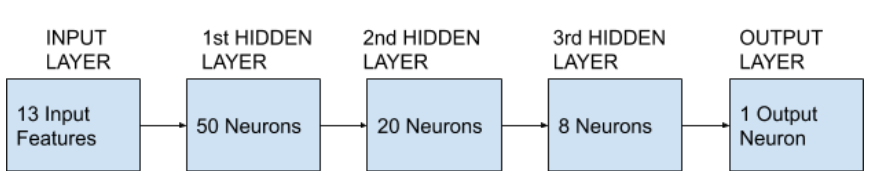

In [ ]:
#Defining the model to be a Sequential Neural Network, by running the Sequential() constructor
model = Sequential()  
#Adding the first hidden layer with 50 neurons, with activation function to be "relu" and a l1 regularization factor of 0.005
model.add(Dense(50, kernel_initializer = 'uniform',input_dim=13, activation='relu',activity_regularizer=l1(0.001)))

#Adding the second hidden layer with 20 neurons, with activation function to be "relu" 
model.add(Dense(20, kernel_initializer = 'uniform',activation='relu'))

#Adding a dropout layer for regularization
model.add(Dropout(0.1))

#Adding the third hidden layer with 8 neurons, with activation function to be "relu"
model.add(Dense(8, kernel_initializer = 'uniform',activation='relu'))

#Adding the final output layer(1 neuron) with activation function to be "sigmoid"
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

#Compiling the model, with the optimizer set to 'adam' and loss function set to 'binary_crossentropy'
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

#Defining the class weights based on the ratio of 0's and 1's in the training data
class_weight = {0: 0.64, 1: 7.66}

#Defining the callback for Early Stopping based on how the validation accuracy is changing, and stopping the training when maxima has been reached.
es = EarlyStopping(monitor='val_accuracy', mode='max',patience=5, restore_best_weights = True) 

#Fitting the defined model on the Training data
history = model.fit(X_train, Y_train, batch_size=10, epochs=25, validation_split=0.1, class_weight=class_weight, callbacks=[es])


###MODEL EVALUATION
The below code uses the trained model to predict the labels for X_test, the 25% of the data that we had taken from the whole training data set, for model evaluation. We then compare the predicted y with the actual labels(Y_test) to find the accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
#Predicting the y values for the test part of the data set(X_test, the 25% of the data that we had taken from the whole training data set, for model evaluation)
y_pred = model.predict(X_test)
#Assigning the y value as 1 if the predicted value is > 0.5, and 0 otherwise
y_pred = (y_pred > 0.5)
#Finding and printing the accuracy score
print(accuracy_score(Y_test, y_pred))
np.savetxt("drive/My Drive/MS4610 Data/ypred.csv", y_pred, delimiter=",")
np.savetxt("drive/My Drive/MS4610 Data/ytest.csv", Y_test, delimiter=",")


###PREDICTION FOR TEST DATA

In [190]:
test_x = pd.read_csv("drive/My Drive/MS4610 Data/test_x.csv")
test_x = np.array(test_x)
# Preprocessing the data for making it compatible with the model
test_x_prs = preprocessor(test_x)

#Predicting the y values for the test dataset given to predict
y_test_pred = model.predict(test_x_prs)
r = len(y_test_pred)
#Assigning the y value as 1 if the predicted value is > 0.5, and 0 otherwise
y_test_pred = (y_test_pred > 0.5)
y_test_pred = y_test_pred.reshape((r,1))
final = np.zeros((r,2))
final[:,0] = test_x[:,0]
final[:,1] = y_test_pred[:,0]
df = pandas.DataFrame(final)
df.columns = ["ID","Labels"]
df.to_csv("drive/My Drive/MS4610 Data/pred_y.csv",index=False)


###PLOTTING
The below 2 cell are used to plot the accuracies and losses against the number of epochs.

In [ ]:
 #Taking the array of accuracies, from the history of training of the model and plotting it against the number of epochs
plt.plot(history.history['accuracy'])  
#Taking the array of validation accuracies, from the history of training of the model and plotting it against the number of epochs
plt.plot(history.history['val_accuracy']) 

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig("drive/My Drive/MS4610 Data/accplot(.JPG")
plt.show()

In [ ]:
#Taking the array of losses, from the history of training of the model and plotting it against the number of epochs
plt.plot(history.history['loss'])    
#Taking the array of validation losses, from the history of training of the model and plotting it against the number of epochs
plt.plot(history.history['val_loss']) 

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig("drive/My Drive/MS4610 Data/lossplot(98.44)).JPG")
plt.show()